<a href="https://colab.research.google.com/github/AmazingGrace-D/RNN-MNIST/blob/main/RNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train.shape,", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape, (60000, 28, 28)


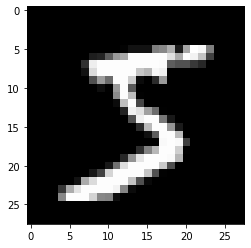

In [3]:
for i in range(10):
  plt.imshow(x_train[i].reshape(28, 28), cmap = 'gray')
  break

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

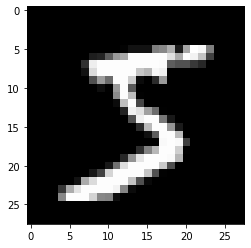

In [5]:
for i in range(10):
  plt.imshow(x_train[i].reshape(28, 28), cmap = 'gray')
  break

In [6]:
x_train[0].shape

(28, 28)

In [7]:
# Model 

i = Input(shape=(x_train[0].shape))
x = LSTM(120)(i)
x = Dense(10, activation = 'softmax')(x)

model = Model(i, x)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
              epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 4ms/step - loss: 0.6454 - accuracy: 0.7835 - val_loss: 0.1821 - val_accuracy: 0.9459
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1206 - accuracy: 0.9626 - val_loss: 0.0825 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0776 - accuracy: 0.9773 - val_loss: 0.0855 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0579 - accuracy: 0.9830 - val_loss: 0.0648 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0470 - accuracy: 0.9864 - val_loss: 0.0576 - val_accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0541 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0536 - val_accuracy

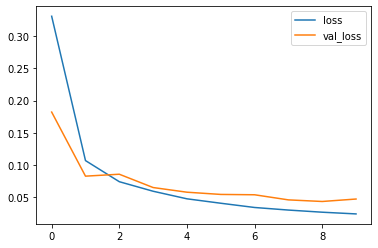

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

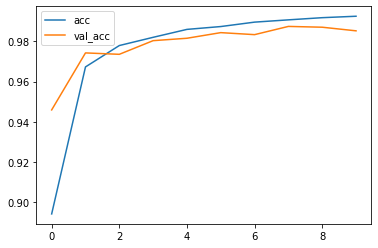

In [9]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion matrix, without normalisation
[[ 971    0    3    0    0    0    2    1    2    1]
 [   1 1130    1    1    0    0    1    0    1    0]
 [   0    1 1023    3    1    0    0    1    3    0]
 [   0    1    6  993    0    6    0    2    2    0]
 [   0    0    0    0  953    0    5    1    3   20]
 [   2    0    0    4    0  881    3    1    1    0]
 [   1    2    1    0    5    1  942    0    5    1]
 [   0    3    6    1    2    3    0 1006    0    7]
 [   0    0    1    3    0    4    0    3  959    4]
 [   1    0    0    1    1    6    0    2    3  995]]


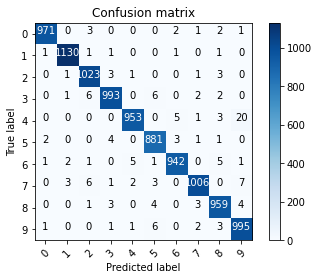

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix. 
  Normalisation can be applied by setting normalize=True
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix, without normalisation")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = ',2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

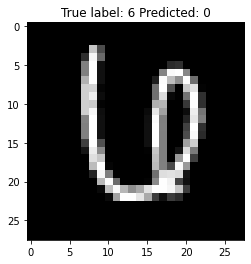

In [16]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));